# ResNet V1 vs V2 

PyTorch has some known flaws in ResNet implementation. For instance, it inplements the original residual block and not its v2 version proposed by the same authors one year later in "Identity Mappings in Deep Residual Networks". Here, we compare ResNet18 from `torchvision.models` against our implementation.

In [1]:
import os
import sys

import torch
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from functools import reduce

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Use {device}')

Use cuda


In [2]:
from omegaconf import OmegaConf
from pathlib import Path
from sklearn.metrics import confusion_matrix

In [3]:
from scipy.special import softmax

Change working directory to the project directory

In [4]:
os.chdir('..')
os.getcwd()

'/var/storage/test-task'

Install required packages in the container and import our modules

In [ ]:
!pip install -r requirements.txt

In [6]:
sys.path.append('modules')
from importlib import reload 
import evaluate
import dataset

/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

### Prediction 

Test both models

In [7]:
test_loss_v1, test_acc_v1, test_outputs_v1 = evaluate.evaluate_model('results/torchvision.resnet18/2020-06-16_09-56-09/')

Read config from results/torchvision.resnet18/2020-06-16_09-56-09/.hydra/config.yaml
Config:
augmentation:
  root: config/augmentation/default.yaml
data:
  classes: 200
  name: tinyimagenet
  root: data/tiny-imagenet-200
  test: test
  train: train
  train_labels: words.txt
  val: val
  val_labels: val_annotations.txt
model:
  arch: resnet18
  module: torchvision
  pretrained: false
optimizer:
  name: SGD
  parameters:
    lr: 0.1
    momentum: 0.9
    weight_decay: 1.0e-08
results:
  checkpoints:
    name: model
    root: checkpoints
    tag: tensorboard
scheduler:
  name: CosineAnnealingLR
  parameters:
    T_max: 39100
train:
  batch_size: 256
  epochs: 100
  monitor: val_acc
  num_workers: 4

Looking for dataset in data/tiny-imagenet-200
Created test dataset (10000) and loader (40): batch size 256, num workers 4
Created model torchvision.resnet18(pretrained=False) with 200 outputs
Loaded model from results/torchvision.resnet18/2020-06-16_09-56-09/checkpoints/model.pth


Test set: Average loss: 0.0131, Accuracy: 3983/10000 (40%)
Loss 0.013119651818275452, acc 39.83
Outputs:
(10000, 200)
[[ -7.96989     -9.814209     7.9087987   -4.451828    -0.15135771]
 [  0.93290496 -12.859021     7.5588937    5.6318045    4.1171007 ]
 [  2.9981666   -9.967363     6.11704      2.3693066    4.9615984 ]
 [  6.7621813    1.8379318   -3.1571648    2.2773793    6.109636  ]
 [ -1.8405946   -3.5486643    4.466968    -0.75191087   5.11757   ]]


In [8]:
test_loss_v2, test_acc_v2, test_outputs_v2 = evaluate.evaluate_model('results/models.resnet18/2020-06-16_13-42-13/')

Read config from results/models.resnet18/2020-06-16_13-42-13/.hydra/config.yaml
Read config from results/models.resnet18/2020-06-16_13-42-13/.hydra/config.yaml
Config:
augmentation:
  root: config/augmentation/default.yaml
data:
  classes: 200
  name: tinyimagenet
  root: data/tiny-imagenet-200
  test: test
  train: train
  train_labels: words.txt
  val: val
  val_labels: val_annotations.txt
model:
  arch: resnet18
  module: models
  pretrained: false
optimizer:
  name: SGD
  parameters:
    lr: 0.1
    momentum: 0.9
    weight_decay: 1.0e-08
results:
  checkpoints:
    name: model
    root: checkpoints
    tag: tensorboard
scheduler:
  name: CosineAnnealingLR
  parameters:
    T_max: 39100
train:
  batch_size: 256
  epochs: 100
  monitor: val_acc
  num_workers: 4

Config:
augmentation:
  root: config/augmentation/default.yaml
data:
  classes: 200
  name: tinyimagenet
  root: data/tiny-imagenet-200
  test: test
  train: train
  train_labels: words.txt
  val: val
  val_labels: val_annot

Test set: Average loss: 0.0097, Accuracy: 4232/10000 (42%)
Test set: Average loss: 0.0097, Accuracy: 4232/10000 (42%)
Loss 0.009669398832321168, acc 42.32
Loss 0.009669398832321168, acc 42.32
Outputs:
(10000, 200)
[[-4.0173483  -5.6638494   3.5332708   0.8560003   4.7968354 ]
 [-0.50069046 -9.593623    0.58142483  1.8307557   1.7564065 ]
 [ 0.53431433 -4.927293    2.0399356   1.5885785   5.3517537 ]
 [ 1.2886459   0.6331884  -0.45851508 -1.9374005   1.126874  ]
 [-2.1130445  -1.6725414  -2.7439947  -3.6594224   2.00356   ]]
Outputs:
(10000, 200)
[[-4.0173483  -5.6638494   3.5332708   0.8560003   4.7968354 ]
 [-0.50069046 -9.593623    0.58142483  1.8307557   1.7564065 ]
 [ 0.53431433 -4.927293    2.0399356   1.5885785   5.3517537 ]
 [ 1.2886459   0.6331884  -0.45851508 -1.9374005   1.126874  ]
 [-2.1130445  -1.6725414  -2.7439947  -3.6594224   2.00356   ]]


Compare the results

In [9]:
print('ResNet18 v1 acc:', test_acc_v1)
print('ResNet18 v2 acc:', test_acc_v2)

ResNet18 v1 acc: 39.83
ResNet18 v2 acc: 42.32


### Training curves 

Read and merge tensorboards

In [10]:
def read_tensorboard(path, tags=['train_accuracy', 'test_accuracy']):
    ea =  EventAccumulator(path)
    ea.Reload()
    dfs = []
    for tag in tags:
        df = pd.DataFrame(ea.Scalars(tag)).drop('wall_time', 1)
        df.columns = ['step', tag]
        dfs.append(df)
    dfs = reduce(lambda left, right: pd.merge(left, right, on='step'), dfs)
    return dfs

In [11]:
training_v1 = read_tensorboard('results/torchvision.resnet18/2020-06-16_09-56-09/tensorboard/events.out.tfevents.1592301403.job-c27dc96c-7b85-4419-9396-1602e15e258b.11.0')
training_v2 = read_tensorboard('results/models.resnet18/2020-06-16_13-42-13/tensorboard/events.out.tfevents.1592314963.job-2c88c6b1-103b-4c1b-838d-0606fb80b0b2.12.0')

training = pd.concat([
    training_v1.assign(model='resnet18-v1'),
    training_v2.assign(model='resnet18-v2')
])
training = training.melt(id_vars=['step', 'model'], value_name='accuracy', var_name='split')

training.split = training.split.str.replace('_accuracy', '')

training.head()

,step,model,split,accuracy
0,0,resnet18-v1,train,3.495
1,1,resnet18-v1,train,7.648
2,2,resnet18-v1,train,10.333
3,3,resnet18-v1,train,12.601
4,4,resnet18-v1,train,14.418


Plot training curves

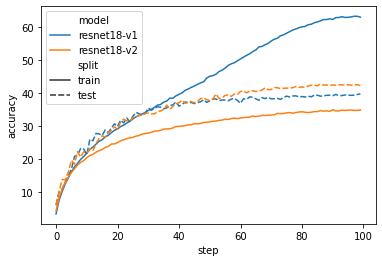

In [12]:
sns.lineplot(x='step', y='accuracy', hue='model', style='split', data=training)
plt.show()

With the same training, v1 managed to overfit much harder to the training set

### Confusion matrices 

Read dataset

In [13]:
cfg = OmegaConf.load('config/data/tinyimagenet.yaml')
print(cfg.pretty())

data:
  classes: 200
  name: tinyimagenet
  root: data/tiny-imagenet-200
  test: test
  train: train
  train_labels: words.txt
  val: val
  val_labels: val_annotations.txt



In [14]:
data_root = Path(cfg.data.root)
val_path = data_root / cfg.data.val
val_dataset = dataset.TinyImagenetDataset(val_path, cfg, None)

In [15]:
cm_v1 = confusion_matrix(y_true=val_dataset._df.label,
                         y_pred=np.argmax(test_outputs_v1, 1))

cm_v2 = confusion_matrix(y_true=val_dataset._df.label,
                         y_pred=np.argmax(test_outputs_v2, 1))

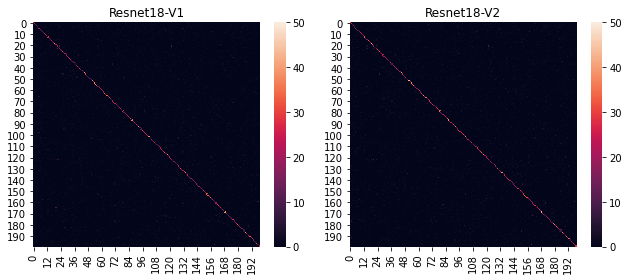

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4))
for cm, ax, t in zip([cm_v1, cm_v2], axes, ['Resnet18-V1', 'Resnet18-V2']):
    sns.heatmap(cm, ax=ax, vmax=50)
    ax.set_title(t)
plt.tight_layout()
plt.show()

### Error analysis

We can take a look at the examples where the network got drastically wrong. For that, we extract the examples with the lowest scores for the correct class.

In [17]:
test_pred_v1 = softmax(test_outputs_v1, 1)
sorted_by_correct_score = np.argsort(test_pred_v1[np.arange(len(test_pred_v1)), val_dataset._df.label.tolist()])
sorted_by_correct_score[:5]

array([2604, 4485, 9248, 6594, 3174])

Get class labels

In [18]:
folders_to_num, val_labels = dataset.get_labels_mapping(cfg)

class_labels = pd.read_csv(data_root / cfg.data.train_labels, sep='\t', header=None)
class_labels[0] = class_labels[0].apply(lambda x: int(folders_to_num[x]) if x in folders_to_num else None)
class_labels = class_labels.dropna()

class_labels_dict = {int(r[0]): r[1].split(',')[0] for i, r in class_labels.iterrows()}

Plot examples

In [19]:
def clean_show(ax):
    "Show plt figure without axes in tight layout"
    plt.setp(ax, xticks=[], yticks=[])
    plt.tight_layout()
    plt.show()

In [20]:
def show_examples(dataset, ids, predictions, s=2):
    n_examples = len(ids)
    fig, axes = plt.subplots(ncols=n_examples, figsize=(s*n_examples, s))
    for ax, i in zip(axes, ids):
        item = dataset[i]
        ax.imshow(item.image)
        ax.set_title(item.id)
        pred_label = np.argmax(predictions[i])
        label = f"T: {class_labels_dict[item.label]} ({predictions[i, item.label]:.2e})\n" \
                f"P: {class_labels_dict[pred_label]} ({predictions[i, pred_label]:.2e})"
        ax.set_xlabel(label)
    clean_show(axes)

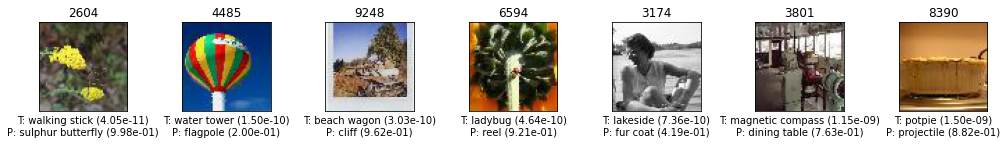

In [21]:
show_examples(val_dataset, sorted_by_correct_score[:7], test_pred_v1)